## 1. Importar librerias

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importar dataset

In [2]:
uber=pd.read_csv('C:/Users/AlexP/Documents/workspace/ML/Laboratorios 9C/Uber.csv')

In [3]:
uber.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


**2. Exploracion de las caracteristicas del dataset y procesamiento**

In [4]:
#visualiza el tamanio del dataset
uber.shape

(14270479, 4)

In [5]:
#Mostrar valores duplicados
uber.duplicated().sum()

np.int64(898225)

In [6]:
#Eliminar valores duplicados
uber.drop_duplicates(inplace=True)

In [7]:
#Verificar la eliminacion de valores duplicados
uber.duplicated().sum()

np.int64(0)

In [8]:
#visualiza el tamanio del dataset
uber.shape

(13372254, 4)

In [9]:
#Visualizar los tipos de datos de las columnas del dataset
uber.dtypes

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [10]:
#Comnvertir la columna Pickup_date de tipo objecto a Datetime
uber['Pickup_date'] = pd.to_datetime(uber['Pickup_date'], format='%Y-%m-%d %H:%M:%S')

In [11]:
#Extraer el mes del dataset
uber.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [12]:
#Extraer los meses del dataset
uber['Pickup_date'].dt.month

0           5
1           5
2           5
3           5
4           5
           ..
14270474    5
14270475    5
14270476    5
14270477    5
14270478    5
Name: Pickup_date, Length: 13372254, dtype: int32

In [13]:
#Extraer los dias del dataset
uber['Pickup_date'].dt.day

0           17
1           17
2           17
3           17
4           17
            ..
14270474     8
14270475     8
14270476     8
14270477     8
14270478     8
Name: Pickup_date, Length: 13372254, dtype: int32

In [14]:
#Extraer y agregar las caracteristicas extraidas
uber['month']=uber['Pickup_date'].dt.month
uber['day']=uber['Pickup_date'].dt.day
uber['weekday']=uber['Pickup_date'].dt.day_name()
uber['hour']=uber['Pickup_date'].dt.hour
uber['minute']=uber['Pickup_date'].dt.minute

#Verificar la creacion de columnas
uber

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,day,weekday,hour,minute
0,B02617,2015-05-17 09:47:00,B02617,141,5,17,Sunday,9,47
1,B02617,2015-05-17 09:47:00,B02617,65,5,17,Sunday,9,47
2,B02617,2015-05-17 09:47:00,B02617,100,5,17,Sunday,9,47
3,B02617,2015-05-17 09:47:00,B02774,80,5,17,Sunday,9,47
4,B02617,2015-05-17 09:47:00,B02617,90,5,17,Sunday,9,47
...,...,...,...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,5,8,Friday,15,43
14270475,B02765,2015-05-08 15:43:00,B02765,263,5,8,Friday,15,43
14270476,B02765,2015-05-08 15:43:00,B02765,90,5,8,Friday,15,43
14270477,B02765,2015-05-08 15:44:00,B01899,45,5,8,Friday,15,44


<Axes: xlabel='month'>

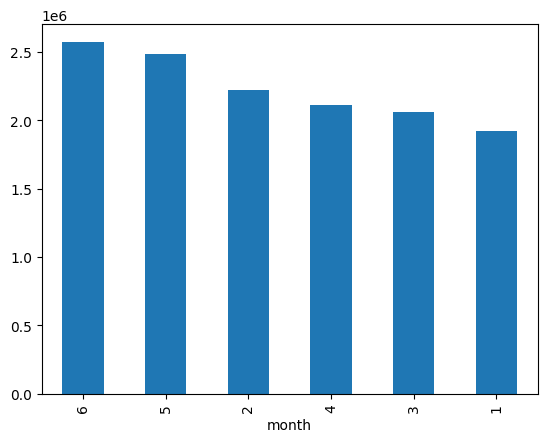

In [15]:
#Grafica los valores obtenidos del conteo mensual de servicios
uber['month'].value_counts().plot(kind='bar')

In [19]:
#Agrupa los datos utilizando las columunas motnh y weekday del dataset y las guardamos en el dataset llamado datagroup1
datagroup1=uber.groupby(['month','weekday'], as_index=False).size()

In [17]:
#Muestra los valores unicos contenidos en la columna math
datagroup1['month'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int32)

In [24]:
#Construye un diccionar LLamada dict month, asignando numero del
dict_month={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'Jun'}
dict_month

{1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April', 5: 'May', 6: 'Jun'}

In [25]:
#A partir del diccionario creadom reemplaza
datagroup1['month']=datagroup1['month'].map(dict_month)
datagroup1['month']

0       Jan
1       Jan
2       Jan
3       Jan
4       Jan
5       Jan
6       Jan
7       Feb
8       Feb
9       Feb
10      Feb
11      Feb
12      Feb
13      Feb
14    March
15    March
16    March
17    March
18    March
19    March
20    March
21    April
22    April
23    April
24    April
25    April
26    April
27    April
28      May
29      May
30      May
31      May
32      May
33      May
34      May
35      Jun
36      Jun
37      Jun
38      Jun
39      Jun
40      Jun
41      Jun
Name: month, dtype: object

In [26]:
datagroup1

,month,weekday,size
0,Jan,Friday,339285
1,Jan,Monday,190606
2,Jan,Saturday,386049
3,Jan,Sunday,230487
4,Jan,Thursday,330319
5,Jan,Tuesday,196574
6,Jan,Wednesday,245650
7,Feb,Friday,373550
8,Feb,Monday,274948
9,Feb,Saturday,368311


<Axes: xlabel='month', ylabel='size'>

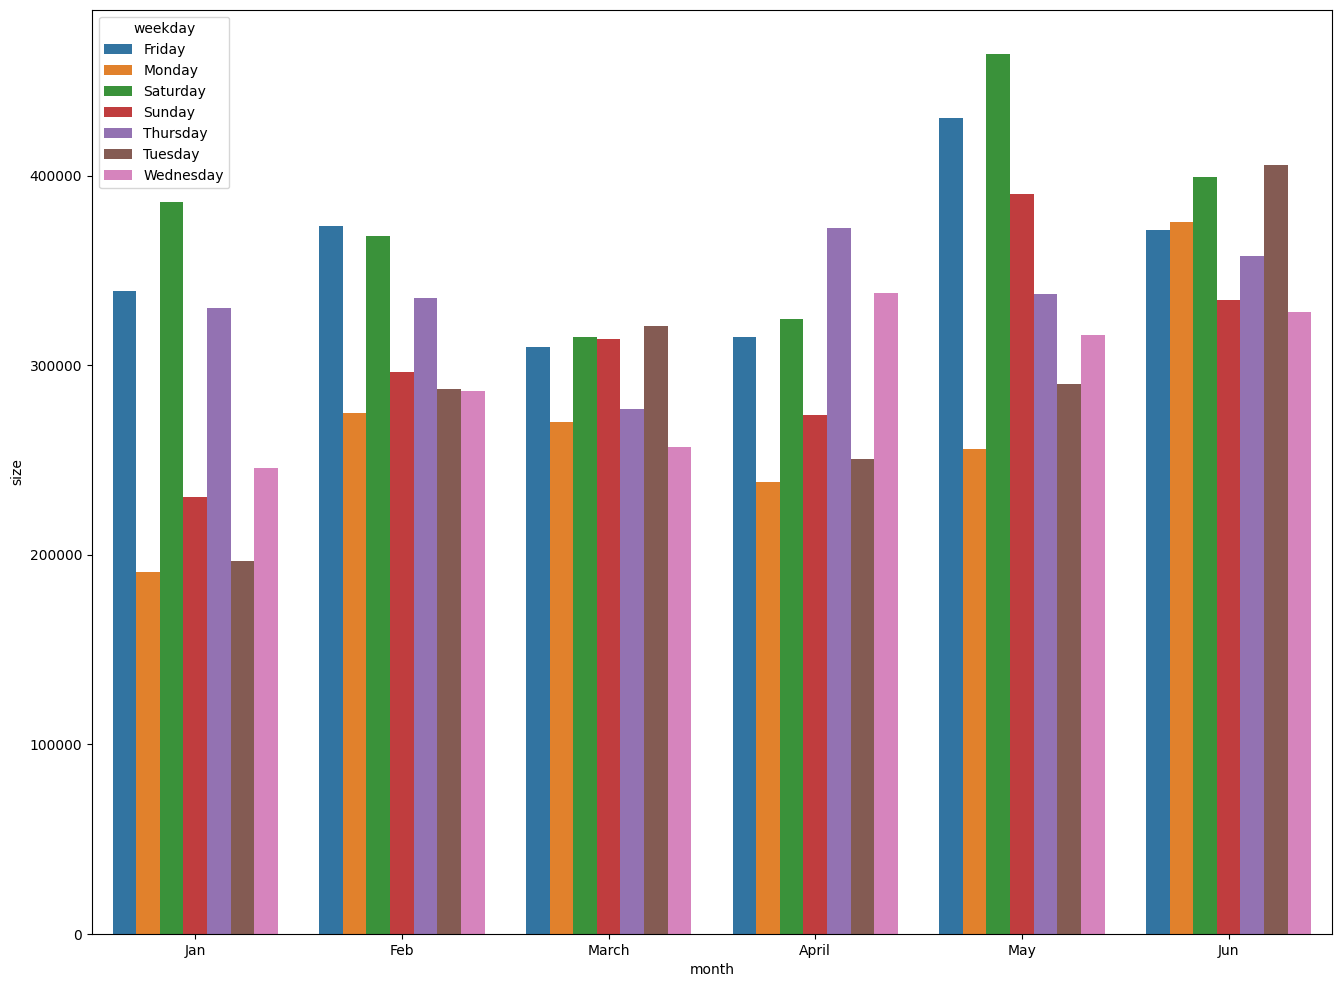

In [27]:
#Graficar el comportamineto mensual y por dias de la demanda de servicios
plt.figure(figsize=(16,12))
sns.barplot(x='month', y='size', hue='weekday', data=datagroup1)

In [31]:
#Agrupar  los datos utilizando lsas columnas weekday y hour del dataset de uber
datagroup2=uber.groupby(['weekday','hour'],as_index=False).size()
datagroup2

,weekday,hour,size
0,Friday,0,79879
1,Friday,1,44563
2,Friday,2,27252
3,Friday,3,19076
4,Friday,4,23049
...,...,...,...
163,Wednesday,19,131317
164,Wednesday,20,123490
165,Wednesday,21,120941
166,Wednesday,22,115208


<Axes: xlabel='hour', ylabel='size'>

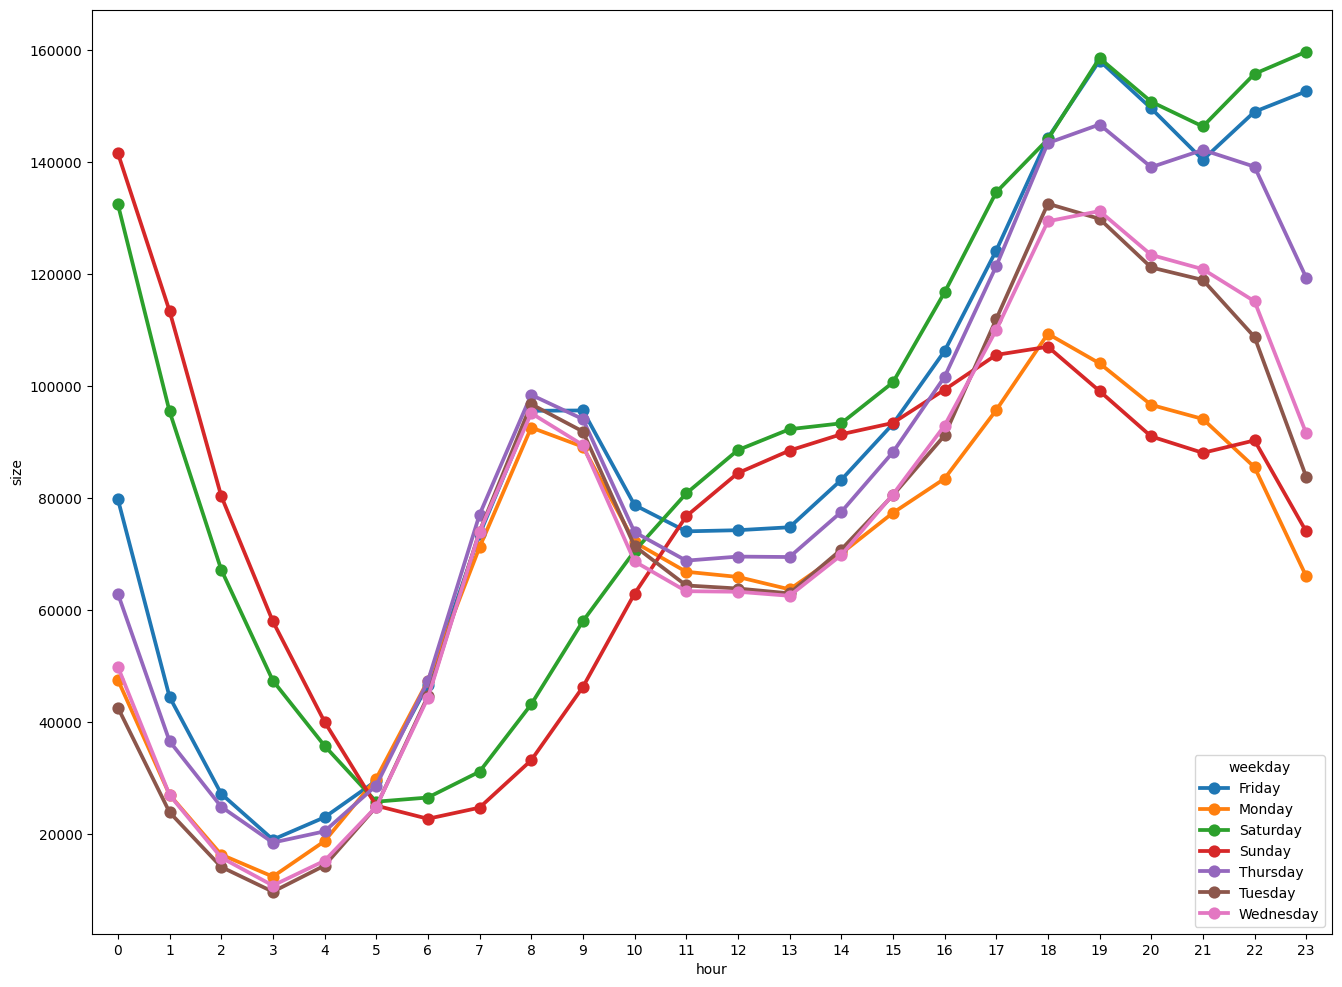

In [32]:
#Graficar el compotamiento de la demanda de serviicos por dias y horas de servicios
plt.figure(figsize=(16,12))
sns.pointplot(x='hour',y='size',hue='weekday', data=datagroup2)

**Observaciones**

In [33]:
1.- Cual es el comportamiento de la demanda de servicios de acuerdo a la grafica los dias Sabado y Domingo en la Mañana?

2.- Cual es el comportamiento de la demanda de servicios de acuerdo a la grafica los dias Sabado y Domingo en la Tarde?

3.- Cual es el comportamiento de la demanda de servicios de acuerdo a la grafica los dias Sabado y Domingo en la Noche?

4.- Cual es la diferencia 

Object `Mañana` not found.
